In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

#Important libraries for CNN and ANN
import tensorflow
from keras.layers import Dense, BatchNormalization, Conv2D, MaxPool2D, Flatten
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.regularizers import L1, L2, L1L2
from keras.layers import Dropout

from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# Imported VGG19 for Trnasfer Learning
from keras.applications.vgg19 import VGG19

# Generated Images to deal Class Imbalance 

In [ ]:
# creating new images using Data Augmentation
import os


base_directory = r"C:\Users\MA\Desktop\TB prediction using CNN\Tuberculosis"
save_directory = r"C:\Users\MA\Desktop\TB prediction using CNN\preview_TB"
num_images_to_generate = 2800
batch_size = 5

datagen = ImageDataGenerator(
    rotation_range = 10,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = False,
    fill_mode = 'nearest',
    brightness_range=[0.8, 1.2],  # Random brightness adjustments between 80% and 120%
    channel_shift_range=0.1
)

original_images = [f for f in os.listdir(base_directory) if f.endswith('.png')]  # Adjust extensions as needed

# Loop through original images to generate augmented images
for img_name in original_images:
    img_path = os.path.join(base_directory, img_name)
    img = load_img(img_path)  # Load the image
    x = img_to_array(img)     # Convert it to a numpy array
    x = x.reshape((1,) + x.shape)  # Reshape it to (1, height, width, channels)


# Generate augmented images and save them
    i = 0
    for batch in datagen.flow(x, batch_size=batch_size, save_to_dir=save_directory,
                              save_prefix='aug', save_format='jpeg'):
        i += 1
        if i >= num_images_to_generate // len(original_images):  # Generate per original image
            break  # Stop after generating enough images


# Transfer Learning VGG19

In [2]:
conv_base = VGG19(
    weights='imagenet',
    include_top = False,
    input_shape= (256,256,3)
)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
#summary of all the layers of VGG19
conv_base.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

### Building Model by Using Transfer Learning

In [4]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())

In [6]:
model.add(Dense(32, activation= 'relu'))


model.add(Dense(16, activation= 'relu'))


model.add(Dense(8, activation= 'relu'))



model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 8, 8, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │       1,048,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,073,665 (80.39 MB)

 Trainable params: 21,073,665 (80.39 MB)

 Non-trainable params: 0 (0.00 B)

#### Freezing the Trainable parameters

In [7]:
conv_base.trainable = False

In [ ]:
# Now, let's check the summary of the parameters after freezing the trainable weights
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 8, 8, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │       1,048,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,073,665 (80.39 MB)

 Trainable params: 1,049,281 (4.00 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

### Compiling our Model

In [8]:
adam_optimizer = Adam(learning_rate=0.001)

model.compile(loss = 'binary_crossentropy', optimizer = adam_optimizer, metrics = ['accuracy'])

# Loading and Training our Model

In [11]:
early_stopping = EarlyStopping( patience=5, restore_best_weights=True)


train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        rotation_range=30,        # Random rotation between 0 and 40 degrees
        brightness_range=[0.8, 1.2],  # Random brightness adjustments between 80% and 120%
        channel_shift_range=0.1   # Random contrast changes by shifting pixel intensity
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        r"/content/drive/MyDrive/Training Data",
        target_size=(256, 256),
        batch_size=64,
        class_mode='binary',
        shuffle =True)

test_generator = test_datagen.flow_from_directory(
        r"/content/drive/MyDrive/Testing data",
        target_size=(256, 256),
        batch_size=64,
        class_mode='binary',
        shuffle=False)

history = model.fit(
        train_generator,
        epochs=15,
        validation_data=test_generator, callbacks = [early_stopping])

Found 4502 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Epoch 1/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 1290s 16s/step - accuracy: 0.6327 - loss: 0.5688 - val_accuracy: 0.8675 - val_loss: 0.3300
Epoch 2/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.9282 - loss: 0.1929 - val_accuracy: 0.9725 - val_loss: 0.1130
Epoch 3/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.9456 - loss: 0.1309 - val_accuracy: 0.9825 - val_loss: 0.0772
Epoch 4/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.9631 - loss: 0.1017 - val_accuracy: 0.9825 - val_loss: 0.0693
Epoch 5/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9636 - loss: 0.0970 - val_accuracy: 0.9825 - val_loss: 0.0583
Epoch 6/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.9655 - loss: 0.0851 - val_accuracy: 0.9775 - val_loss: 0.0750
Epoch 7/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.9767 - loss: 0.0677 - val_accuracy: 0.9925 - val_loss: 0.0503
Epoch 8/15
71/71 ━━━━━━━━━

In [12]:
# checking accuracy of model
loss, accuracy = model.evaluate(test_generator)

print(f'\nTest Accuracy is {accuracy}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 650ms/step - accuracy: 0.9947 - loss: 0.0265

Test Accuracy is 0.9950000047683716


**Training and Testing Accuracy**

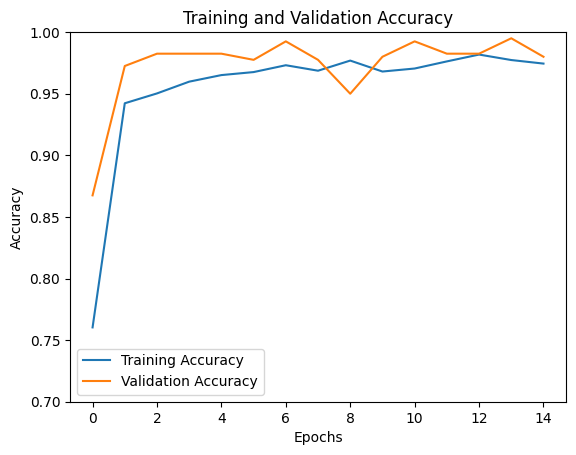

In [14]:
# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
# Plot validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylim(0.70, 1.00)
# Add legend to the plot
plt.legend()
# Show the plot
plt.show()

**Training and Validation Loss**

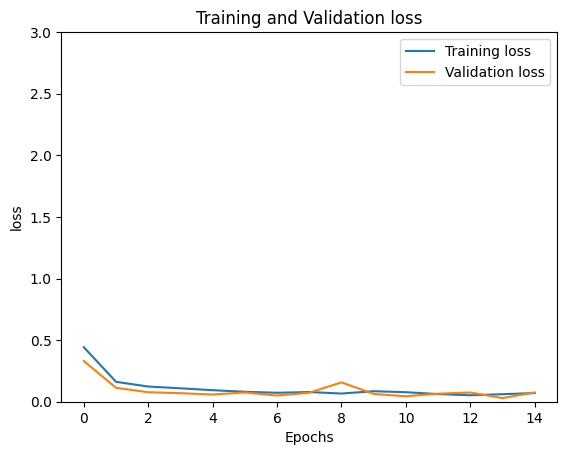

In [15]:
# Plot training accuracy
plt.plot(history.history['loss'], label='Training loss')
# Plot validation accuracy
plt.plot(history.history['val_loss'], label='Validation loss')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.ylim(0, 3.00)
# Add legend to the plot
plt.legend()
# Show the plot
plt.show()

**Classification Report and Confusion Metrics**

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 586ms/step
Classification Report:
              precision    recall  f1-score   support

      Not TB       0.99      0.99      0.99       200
          TB       0.99      0.99      0.99       200

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



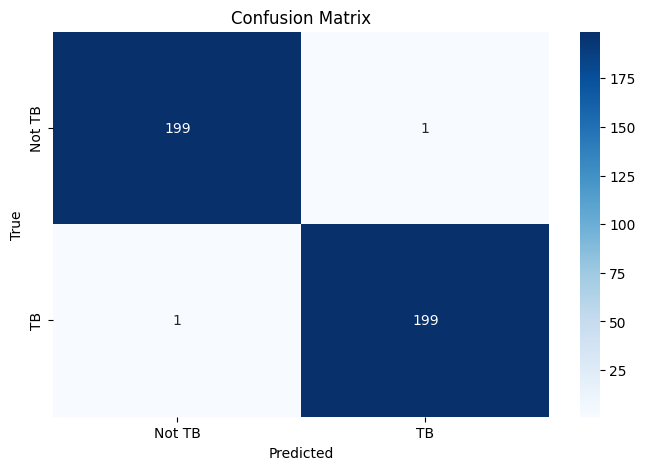

In [16]:
# Predict on test data
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary class labels

# Extract true labels from test_generator
y_test = test_generator.classes

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not TB', 'TB']))  # Assuming binary classification 'Not TB' and 'TB'

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not TB', 'TB'], yticklabels=['Not TB', 'TB'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Building CNN

In [ ]:
cnn = Sequential()

In [ ]:
cnn.add(Conv2D(16, (2,2), input_shape = (256,256,3), activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))

cnn.add(Conv2D(32, (2,2), activation = 'relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))

cnn.add(Conv2D(64, (2,2), activation = 'relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))

cnn.add(Conv2D(128, (2,2), activation = 'relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))


cnn.add(Flatten())

C:\Users\MA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.add(Dense(256, activation= 'relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))

cnn.add(Dense(128, activation= 'relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))

cnn.add(Dense(64, activation= 'relu'))
cnn.add(BatchNormalization())


cnn.add(Dense(32, activation= 'relu'))
cnn.add(BatchNormalization())


cnn.add(Dense(16, activation= 'relu'))
cnn.add(BatchNormalization())


cnn.add(Dense(8, activation= 'relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))


cnn.add(Dense(1, activation = 'sigmoid'))

### Compiling our Model

In [ ]:
adam_optimizer = Adam(learning_rate=0.001)

cnn.compile(loss = 'binary_crossentropy', optimizer = adam_optimizer, metrics = ['accuracy'])

## Loading and Training our Model

In [ ]:
early_stopping = EarlyStopping( patience=5, restore_best_weights=True)


train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        rotation_range=30,        # Random rotation between 0 and 40 degrees
        brightness_range=[0.8, 1.2],  # Random brightness adjustments between 80% and 120%
        channel_shift_range=0.1   # Random contrast changes by shifting pixel intensity
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        r"C:\Users\MA\Desktop\TB prediction using CNN\Training Data",
        target_size=(256, 256),
        batch_size=32,
        class_mode='binary',
        shuffle =True)

test_generator = test_datagen.flow_from_directory(
        r"C:\Users\MA\Desktop\TB prediction using CNN\Testing data",
        target_size=(256, 256),
        batch_size=32,
        class_mode='binary',
        shuffle=False)

history = cnn.fit(
        train_generator,
        epochs=15,
        validation_data=test_generator, callbacks = [early_stopping])

Found 4492 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Epoch 1/15


C:\Users\MA\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


141/141 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.7311 - loss: 0.5540 - val_accuracy: 0.5000 - val_loss: 1.1681
Epoch 2/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.8607 - loss: 0.3487 - val_accuracy: 0.5475 - val_loss: 0.8325
Epoch 3/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.8899 - loss: 0.2774 - val_accuracy: 0.9250 - val_loss: 0.2731
Epoch 4/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 222s 2s/step - accuracy: 0.8822 - loss: 0.3042 - val_accuracy: 0.9200 - val_loss: 0.2447
Epoch 5/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.8819 - loss: 0.2949 - val_accuracy: 0.9350 - val_loss: 0.2131
Epoch 6/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 217s 1s/step - accuracy: 0.8977 - loss: 0.2726 - val_accuracy: 0.8675 - val_loss: 0.3458
Epoch 7/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 1812s 13s/step - accuracy: 0.9027 - loss: 0.2508 - val_accuracy: 0.8475 - val_loss: 0.3242
Epoch 8/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - accuracy: 0.8944 - loss: 0.2642 - val_accuracy: 0.7

# Results

In [ ]:
# checking accuracy of model
loss, accuracy = cnn.evaluate(test_generator)

print(f'\nTest Accuracy is {accuracy}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 325ms/step - accuracy: 0.9200 - loss: 0.2618

Test Accuracy is 0.9350000023841858


### Training and Validation Accuracy

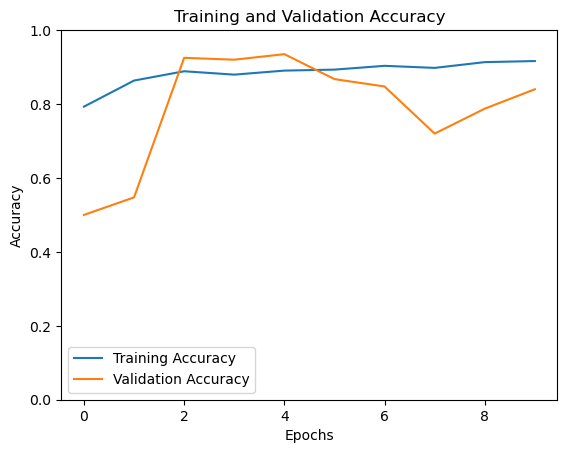

In [ ]:
# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
# Plot validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylim(0, 1.00)
# Add legend to the plot
plt.legend()
# Show the plot
plt.show()

### Training and Validation Loss

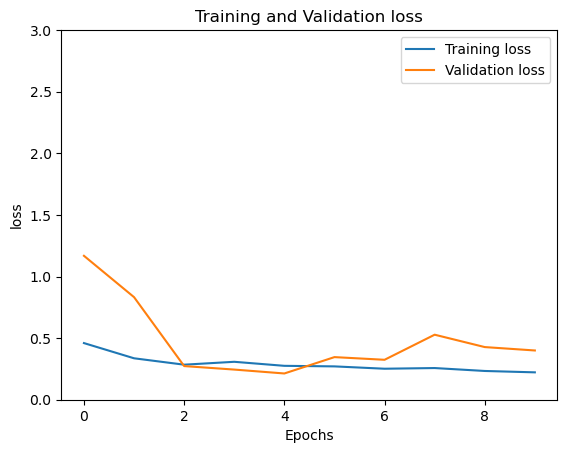

In [ ]:
# Plot training accuracy
plt.plot(history.history['loss'], label='Training loss')
# Plot validation accuracy
plt.plot(history.history['val_loss'], label='Validation loss')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.ylim(0, 3.00)
# Add legend to the plot
plt.legend()
# Show the plot
plt.show()

### Classification Report and Confusion Metrix

13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 499ms/step
Classification Report:
              precision    recall  f1-score   support

      Not TB       0.96      0.91      0.93       200
          TB       0.91      0.96      0.94       200

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.93       400
weighted avg       0.94      0.94      0.93       400



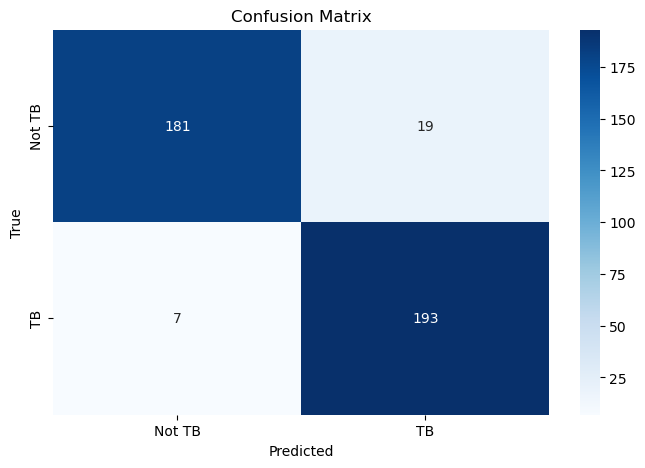

In [ ]:
# Predict on test data
y_pred = cnn.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary class labels

# Extract true labels from test_generator
y_test = test_generator.classes

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not TB', 'TB']))  # Assuming binary classification 'Not TB' and 'TB'

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not TB', 'TB'], yticklabels=['Not TB', 'TB'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()